# Actividades de clase, semanas 4, 5 y 6 [Segunda parte]

Practica del día 25 de junio, consta de un módulo (módulo III) que corresponde a convoluciones.

## Ayuda: Recuerde descargar el repositorio de GitHub del curso, donde estan los notebooks actualizados e implementaciones en python3.

## Aunque el ejercicio explícitamente no lo indique, recuerde que debe dar una breve conclusión de cada uno de los resultados obtenidos al finalizar cada punto.

In [6]:
#Importar librerias
%matplotlib inline

import cv2
import matplotlib.pyplot as plt
import numpy as np
import math
import time

# Módulo III (cont.)

## 2.

Lea la imagen "gato.jpg" que se encuentra en la carpeta "res" en RGB. A continuación, se muestran dos funciones para creación e implementación de kernels.

## Convolución con las funciones make_kernel y apply_kernel:
Utilizando las funciones anteriores, implemente una convolución a la imagen "res/gato.jpg" con un kernel de <b>tamaño 15x15. </b>

Explique: ¿Qué hace la función make_kernel? ¿Qué hace la función apply_kernel? ¿Por qué considera usted que los bordes se ven de color negro (adquieren valor 0)

### Debe obtener un resultado como este:

<img src = "res/convog.png">


## Convolución con Filter2D:

Utilizando la misma imagen ("res/gato.jpg"), con un kernel de <b> tamaño 15x15 </b>, realice el proceso de convolución, esta vez haga uso de la función cv2.filter2D (utilice el parámetro borderType = cv2.BORDER_REPLICATE).


### Debe obtener un resultado como este:

<img src = "res/conv.png">

# Mida la eficiencia de ambos procesos, utilizando la librería time de python.

¿Cuanto tarda cada caso de convolución implementado?

# Solución del modulo 3 punto 2
## Primera convolución

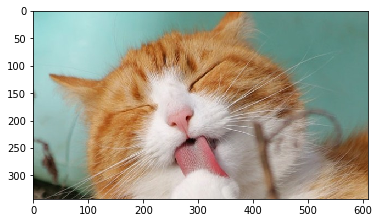

In [7]:
#LEER LA IMAGEN
img = cv2.imread('res/gato.jpg', cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

C:\Users\Carlos Mario\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
C:\Users\Carlos Mario\Anaconda3\lib\site-packages\ipykernel_launcher.py:53: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


172.4821779199999 seconds


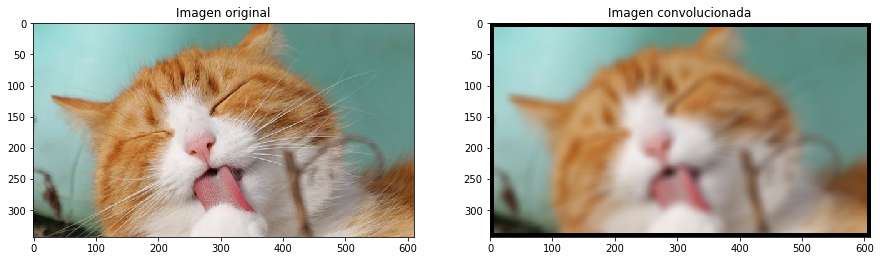

In [8]:
##CODIGO REUTILIZADO DE LAS PRACTICAS PARA GENERAR Y APLICAR UN KERNEL

#Función para hacer el kernel, su parámetro es el tamaño de éste
def make_kernel(size):
    #Matriz de unos del tamaño de entrada, datos de tipo flotante
    kernel = np.ones((size,size),dtype=np.float64)
    #r corresponde al entero más grande que sea menor o igual a size/2
    r = math.floor(size/2)
    return (r,kernel/(size**2))

#Función de aplicación de kernel sobre la imagen bajo los parámetros 
#imagen de entrada, máscara, valores en x,y,kernel,r
def apply_kernel(img, res, x,y,kernel,r):
    #Recorrer la imagen en el intervalo del radio del kernel
    for i in range(-r, r+1):
        for j in range(-r, r+1):
            #Convolución sobre cada pixel de la imagen
            res[x][y] += img[x+i][y+j] * kernel[r+i][r+j]

            
### CODIGO REUTILIZADO DE LAS PRACTICAS PARA DEFINIR EL TAMAÑO Y RANGO DEL KERNEL Y APLICAR LA CONVOLUCIÓN
k_size = 15
#Obtener un kernel que se ajusta al tamaño solicitado mediante la función
(r, kernel) = make_kernel(k_size)
#Crear la matriz de ceros del tamaño de la imagen de entrada, tipo de datos flotante
res = np.zeros(img.shape, dtype=np.float64)

#INICIAR TEMPORIZADOR PARA CASO CONVOLUCION 1
### Implementación de la librería time
import time

t0 = time.clock()
##aquí van todos los procesos que usted desea cuantificar


#Realizar la operación convolución sobre toda la imagen de entrada
for i in range(r,img.shape[0]-r):
    for j in range(r, img.shape[1]-r):
        apply_kernel(img, res, i, j, kernel, r)

#Asegurar el tipo de dato uint8
res=res.astype(np.uint8)

#Generar un subplot 1x2 que muestre imagen original y la convolución
fig, arreglo_plots = plt.subplots(1,2, figsize=(15, 15))

arreglo_plots[0].set_title('Imagen original')
arreglo_plots[0].imshow(img, cmap="gray", vmin=0, vmax=255)

arreglo_plots[1].set_title('Imagen convolucionada')
arreglo_plots[1].imshow(res, cmap="gray", vmin=0, vmax=255)

print (time.clock()-t0,"seconds")

#### Analisis primera convolución
Respondiendo primero a las preguntas la función make_kernel sirve para crear el kernel generando una matriz de unos (1) con K_size y un rango del kernel r, la función apply_kernel sirve para recorrer la imagen en el rango del kernel para cada punto XY y realizar la convolución en ese punto XY

El borde de la imagen se hace negro debido a que la convolucion en esos puntos se hace 0 ya que en los extremos la mascara excede los limites de la imagen.

Como se puede observar en la imagen este filtro o convolución con kernel produce una especie de difuminación en la imágen, tambien parece que la imagen puede estar desenfocada.

El tiempo total del proceso en la prueba realizada durante el desarrollo de la práctica fue de 182 segundos, lo que equivale a mas de 3 minutos de procesamiento, un tiempo bastante alto para la aplicación de un filtro en una imagen, esto puede deberse a que este metodo recorre uno a uno los pixeles.

## Segunda Convolución

C:\Users\Carlos Mario\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
C:\Users\Carlos Mario\Anaconda3\lib\site-packages\ipykernel_launcher.py:43: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


0.04230173100017964 seconds


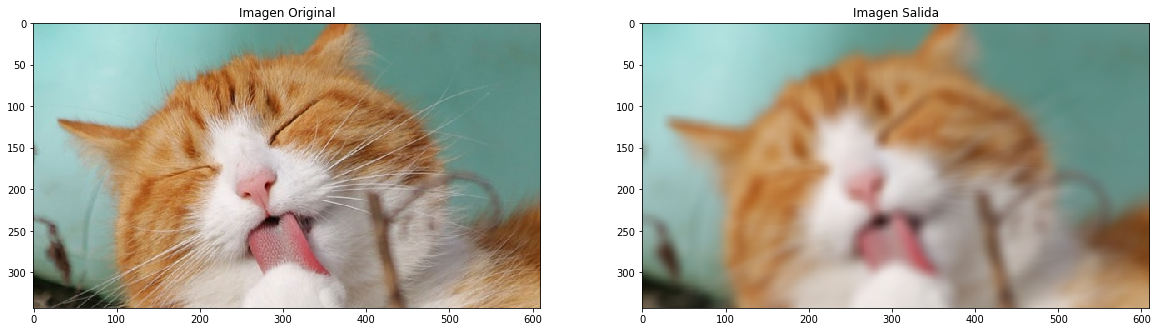

In [10]:
## REALIZAR LA CONVOLUCIÓN CON CV2.FILTER2D

#Importar librerias
%matplotlib inline

import cv2
import numpy as np
from matplotlib import pyplot as plt

#Leer la imagen
img = cv2.imread('res/gato.jpg', cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

#Crear un kernel de tamaño 15
k_size = 15

#Obtener un kernel que se ajusta al tamaño solicitado mediante la función
(r, kernel) = make_kernel(k_size)


##INICIAR EL TEMPORIZADOR DEL CASO 2
### Implementación de la librería time
import time

t0 = time.clock()
##aquí van todos los procesos que usted desea cuantificar


#Aplicar filter2D sobre la imagen y el kernel arbitrario, bajo la alternativa de borde preferida
res = cv2.filter2D(img, ddepth=-1, kernel= kernel, borderType=cv2.BORDER_REPLICATE)

#Mostrar la imagen original y la imagen bajo filter2D
fig = plt.figure(figsize=(20,24))

plt.subplot(1,2,1)
plt.imshow(img,cmap='gray')
plt.title("Imagen Original")

plt.subplot(1,2,2)
plt.imshow(res,cmap='gray')
plt.title("Imagen Salida")

print (time.clock()-t0,"seconds")

#### Analisis segunda convolución

En este caso se usó un filtro de cv2 el cual permitio en un solo comando solucionar el problema de los bordes de la imagen haciendo una replica en estos bordes y realizar la convolución al mismo tiempo obteniendo el mismo filtro que en la primera convolución, pero la mayor diferencia es la eficiencía en el tiempo de que le tomá al coódigo procesarse, en esta segunda convolución con el filtro de cv2 el proceso tardó 0,06 segundos, recordando que el metodo anterior tardo unos 182 segundos y comparando ambos metodos se interpreta que en el tiempo en el que el primer metodo aplica una vez el filtro, el segundo metodo es capaz de aplicar mas de 3000 veces el mismos filtro, lo que nos permite decir que el segundo metodo es por mucho mas eficiente que el primero.

## 3.

Lea la imagen "gato.jpg" que se encuentra en la carpeta "res" en RGB. En este ejercicio usted debe recrear distintos tipos de ruido que se presentan en imágenes.

El ruido es un factor que se encuentra en la mayoría de los problemas de visión artificial, utilizando las funciones de ruido Gaussiano, Pimienta y Poisson, obtenga:

<img src = "res/gatoxf.png">

A continuación se muestra la implementación de las funciones:

## Sugerencia: Ajuste los parámetros std = 50, s_vs_p =  0.5, amount = 0.05

## No olvide variar los parámetros y observar qué ocurre al hacerlo.

## Solución punto 3 

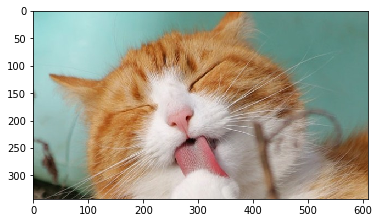

In [11]:
#LEER LA IMAGEN

#Importar librerias
%matplotlib inline

import cv2
import matplotlib.pyplot as plt
import numpy as np
import math
import time

img = cv2.imread('res/gato.jpg', cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

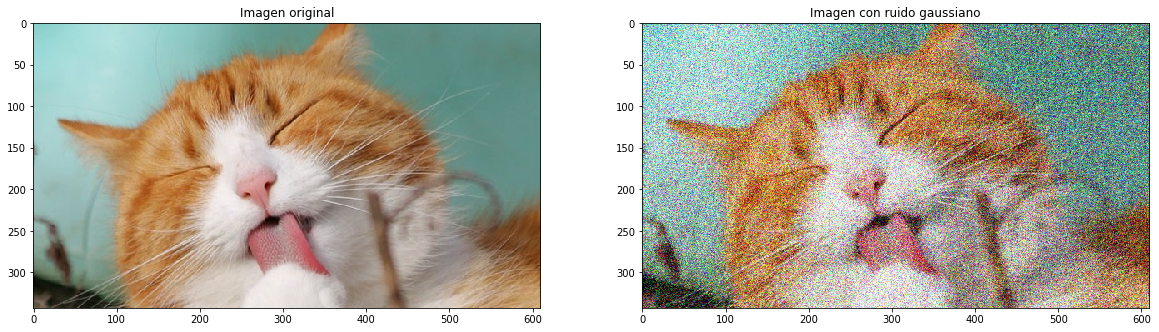

In [12]:
###CODIGO REUTILIZADO DE LA PRACTICA 6 PARA APLICAR RUIDO GAUSSIANO AJUSTANDO STD = 50

#Importar librerias
%matplotlib inline

import cv2
import matplotlib.pyplot as plt
import numpy as np

#Definir la función ruido gaussiano
def gaussian_noise(img, std = 0.02):
    #Las variables row, col y ch dependen de la imagen de entrada y sus componentes
    mean = 0
    row = img.shape[0]
    col = img.shape[1]
    ch =  img.shape[2] if len(img.shape) == 3 else 1       
    #Definir la matriz de ceros noisy  del mismo tamaño que la imagen original
    noisy = np.zeros(img.shape, np.float64)
    #Generar una distribución normal a partir del comando de numpy
    gauss = np.random.normal(mean,std,(row,col,ch)) if ch > 1 else np.random.normal(mean,std,(row,col))
    gauss = gauss.reshape(row,col,ch)               if ch > 1 else gauss.reshape(row,col)
    #La imagen con ruido gaussiano es la suma de la imagen de entrada con la procesada
    noisy =  img + gauss
    #Ajustar los datos para que estén entre 0 y 255
    noisy[noisy<0] = 0
    noisy[noisy>255] = 255
    return noisy


#Escribir la desviación estandar y leer la imagen a color
std = 50

#Aplicar ruido gaussiano y darle tipo de dato uint8
resG = gaussian_noise(img, std)
resG = resG.astype(np.uint8)

#Generar un subplot 1x2 para mostrar la imagen original y la imagen con ruido gaussiano
fig, arreglo_plots = plt.subplots(1,2, figsize=(20, 20))

arreglo_plots[0].set_title('Imagen original')
arreglo_plots[0].imshow(img, cmap="gray")

arreglo_plots[1].set_title('Imagen con ruido gaussiano')
arreglo_plots[1].imshow(resG, cmap="gray")

C:\Users\Carlos Mario\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
C:\Users\Carlos Mario\Anaconda3\lib\site-packages\ipykernel_launcher.py:38: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


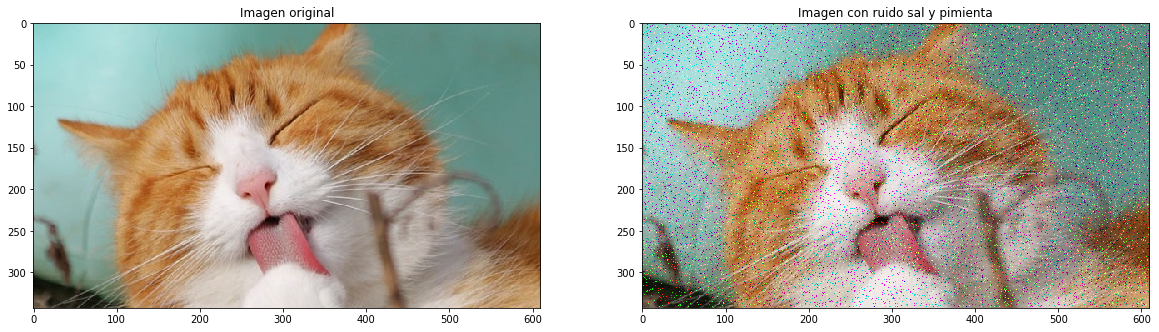

In [13]:
#Importar librerias
%matplotlib inline

import cv2
import matplotlib.pyplot as plt
import numpy as np

#Definir la función de ruido impulsivo
def sp_noise(img, s_vs_p = 0.5, amount = 0.004):
    
    #Obtener los valores de row, col y ch con base en la imagen de entrada
    row = img.shape[0]
    col = img.shape[1]
    ch =  img.shape[2] if len(img.shape) == 3 else 1  
    
    #Crear una copia de la imagen para volverla ruidosa
    noisy = img.copy()
    
    # Salt mode
    
    #Multiplica los parámetros con el tamaño de la imagen, los redondea al mínimo entero
    num_salt = np.ceil(amount * img.size * s_vs_p)
    #Genera el vector coordenadas en la imagen de copia usando la función randint de numpy
    coords = [np.random.randint(0, i - 1, int(num_salt))
          for i in img.shape]

    #La imagen evaluada en el vector coords se satura
    noisy[coords] = 255
    
    # Pepper mode
    
    #Se multiplican los parámetros por el tamaño de la imagen, variando s_vs_p
    num_pepper = np.ceil(amount* img.size * (1. - s_vs_p))
    #Generar el vector coords utilizando randint
    coords = [np.random.randint(0, i - 1, int(num_pepper))
          for i in img.shape]
    #La imagen en el vector coords se satura en color negro
    noisy[coords] = 0
    return noisy

#np.random.uniform()
#Dar valores a los parámetros de entrada de la función ruido
s_vs_p = 0.5
amount = 0.05


#Aplicar la función ruido y volver el tipo de dato uint8
resSP = sp_noise(img, s_vs_p, amount)
resSP = resSP.astype(np.uint8)

#Generar un subplot 1x2 para mostrar imagen original e imagen con ruido sal y pimienta
fig, arreglo_plots = plt.subplots(1,2, figsize=(20, 20))

arreglo_plots[0].set_title('Imagen original')
arreglo_plots[0].imshow(img, cmap="gray", vmin=0, vmax=255)

arreglo_plots[1].set_title('Imagen con ruido sal y pimienta')
arreglo_plots[1].imshow(resSP, cmap="gray", vmin=0, vmax=255)

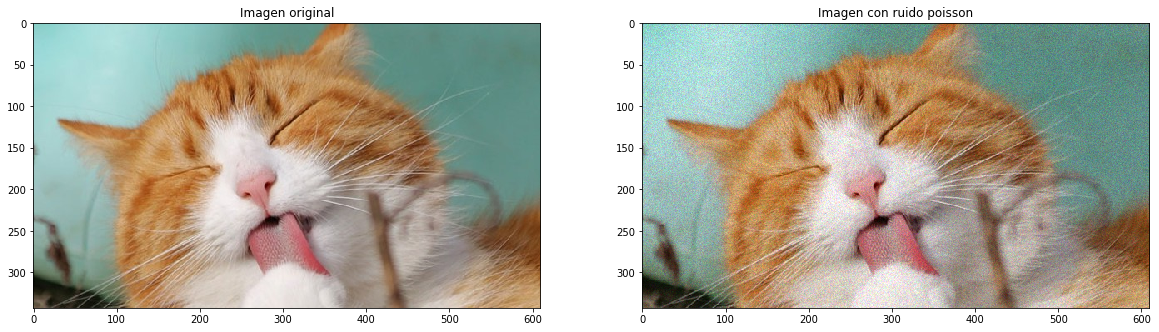

In [14]:
##CODIGO REUTILIZADO DE LA PRACTICA 6 PARA RUIDO POISSON

#Importar librerias
%matplotlib inline

import cv2
import matplotlib.pyplot as plt
import numpy as np

#Definir la función ruido de Poisson
def poisson_noise(img):
    
    #Se aplica el comando de numpy random.poisson a la imagen de entrada
    noisy = np.random.poisson(img) 
    #Los valores deben estar entre 0 y 255
    noisy[noisy<0] = 0
    noisy[noisy>255] = 255
    return noisy

#dist_width = 1

#Aplicar ruido de Poisson a la imagen y volver al tipo de dato uint8
res = poisson_noise(img)
res = res.astype(np.uint8)

#Generar el subplot 1x2 para mostrar imagen original e imagen ruidosa
fig, arreglo_plots = plt.subplots(1,2, figsize=(20, 20))

arreglo_plots[0].set_title('Imagen original')
arreglo_plots[0].imshow(img, cmap="gray", vmin=0, vmax=255)

arreglo_plots[1].set_title('Imagen con ruido poisson')
arreglo_plots[1].imshow(res, cmap="gray", vmin=0, vmax=255)

### Concluciones

En el caso del ruido gaussiano el efecto se parece a la distorción de imagen producida en las pantallas de televisión antiguas degradanto todos los puntos de la imagen, el parámetro std define la intensidad de este filtro, entre mayor sea su valor, mayor es la distroción

Para el filtro sal y pimienta el resultado es una superposición de puntos de colores a lo largo de toda la imgagen, el parámetro s_vs_p nos ayuda a entender el nombre de este filtro, sus valores varian entre 0 (pimienta) y 1 (sal), entre mas cercano sea su valor los puntos del filtro tienden a ser de colores claros como amarillos y verdes y cuando tiende a 0 los colores de los puntos del filtro tienen a colores mas obscuros como azul y morado. El parámetro amount define la densidad del filtro, visto de otra forma entre mayor sea este valor mas puntos apareceran en el filtro. Tambien se identificó que si el parametro amount se "satura" la imagen toma un color aul obscuro.

El filtro poisson produce un efecto como de foto clasica, es muy parecido al filtro gaussiano pero no altera tanto los colores originales de la foto


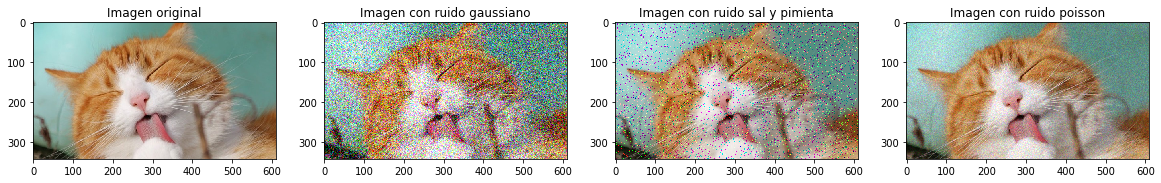

In [15]:
# Representación de la imagen origigan con los filtros del ejercicio

#Generar el subplot 1x2 para mostrar imagen original e imagen ruidosa
fig, arreglo_plots = plt.subplots(1,4, figsize=(20, 20))

arreglo_plots[0].set_title('Imagen original')
arreglo_plots[0].imshow(img, cmap="gray", vmin=0, vmax=255)

arreglo_plots[1].set_title('Imagen con ruido gaussiano')
arreglo_plots[1].imshow(resG, cmap="gray")

arreglo_plots[2].set_title('Imagen con ruido sal y pimienta')
arreglo_plots[2].imshow(resSP, cmap="gray", vmin=0, vmax=255)

arreglo_plots[3].set_title('Imagen con ruido poisson')
arreglo_plots[3].imshow(res, cmap="gray", vmin=0, vmax=255)

## 4.

Lea la imagen 'res/rice.png'. Aplique 100 veces sucesivas un filtro de media de 3x3 a la imagen. ¿Qué resultado obtuvo?, ¿Qué comentarios puede hacer al respecto?

Ahora aplique 100 veces un filtro de media de 11x11 a la imagen. Compare y discuta los resultados obtenidos comparados con la imagen anterior.

¿Qué ocurre si el filtro 3x3 se aplica únicamente 2 veces? ¿Qué ocurre con 10? ¿Qué pasaría si se aplica un filtro de media infinitas veces a la imagen? 

## Ayuda:

Cuando aplique 100 veces el filtro de media 3x3 debe obtener lo siguiente:

<img src = "res/scenario.png">

###  Implementación del filtro:

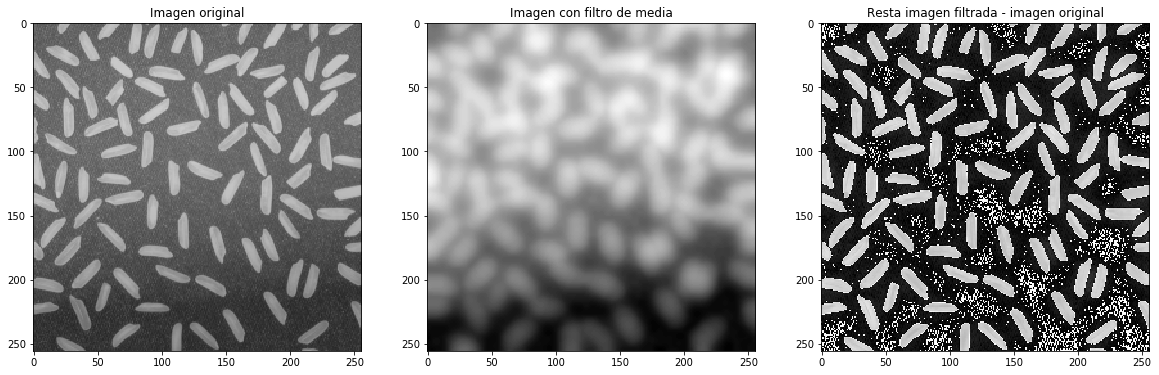

In [26]:
####Implementación 100 veces filtro####
img =  cv2.imread("res/rice.png",0)

#tamaño del kernel
k_size = 3
#crear el kernel
kernel = np.ones((k_size,k_size),np.float64)/(k_size**2)
#crear imagen que se va a modificar las n veces que se aplique el filtro
res2 = img.copy()
#ciclo que implementa el filtro de media
for i in range(0,100):
    res2 = cv2.filter2D(res2, ddepth=-1, kernel= kernel, borderType=cv2.BORDER_REPLICATE)
    
    
resta =  res2 - img
    
fig, arreglo_plots = plt.subplots(1,3, figsize=(20, 20))

arreglo_plots[0].set_title('Imagen original')
arreglo_plots[0].imshow(img, cmap="gray", vmin=0, vmax=255)

arreglo_plots[1].set_title('Imagen con filtro de media')
arreglo_plots[1].imshow(res2, cmap="gray")

arreglo_plots[2].set_title('Resta imagen filtrada - imagen original')
arreglo_plots[2].imshow(resta, cmap="gray", vmin=0, vmax=255)

## 5.

Utilice la función de ruido sal y pimienta (sp_noise), con s_vs_p = amount = 0.7.

Lea la imagen "gato.jpg" que se encuentra en la carpeta "res", introduzcala en la función de ruido pimienta y posteriomente, aplique un filtro de mediana con kernel de tamaño 7x7.

<img src = "res/filter.png">

Recuerde utilizar la función cv2.medianBlur.

C:\Users\Carlos Mario\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
C:\Users\Carlos Mario\Anaconda3\lib\site-packages\ipykernel_launcher.py:38: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


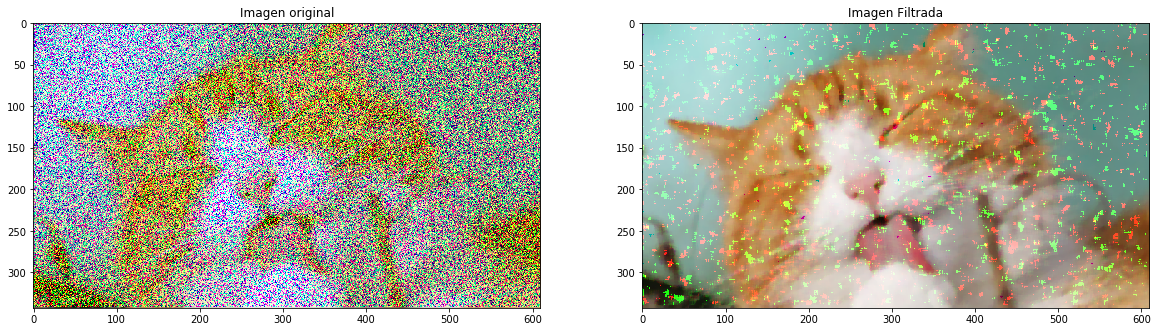

In [35]:
img =  cv2.imread("res/gato.jpg", cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

#tamaño del kernel
k_size = 7
#crear el kernel
kernel = np.ones((k_size,k_size),np.float64)/(k_size**2)
#crear imagen que se va a modificar las n veces que se aplique el filtro
res2 = img.copy()


s_vs_p = 0.7
amount = 0.7

#Aplicar la función ruido y volver el tipo de dato uint8
res = sp_noise(img, s_vs_p, amount)
res = res.astype(np.uint8)

res2 = cv2.medianBlur(res, k_size)

fig, arreglo_plots = plt.subplots(1,2, figsize=(20, 20))

arreglo_plots[0].set_title('Imagen original')
arreglo_plots[0].imshow(res, cmap="gray", vmin=0, vmax=255)

arreglo_plots[1].set_title('Imagen Filtrada')
arreglo_plots[1].imshow(res2, cmap="gray")



